In [1]:
import pandas as pd 
import numpy as np 
import string # specal operation on string
import spacy # language model

In [2]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [114]:
data=pd.read_csv("Elon_musk.csv",error_bad_lines=False)

In [115]:
data

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [116]:
data=data.drop(data.columns[0],axis=1)


In [117]:
data=data.rename({"Text":"x"},axis=1)
data

,x
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [119]:
data['x'] = data['x'].fillna('').apply(str)
data

,x
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [121]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [122]:
data["x"] = data["x"].apply(cleantext)

data.head()

,x
0,I�m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [123]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["x"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)

data

,x,subjectivity,polarity
0,I�m an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


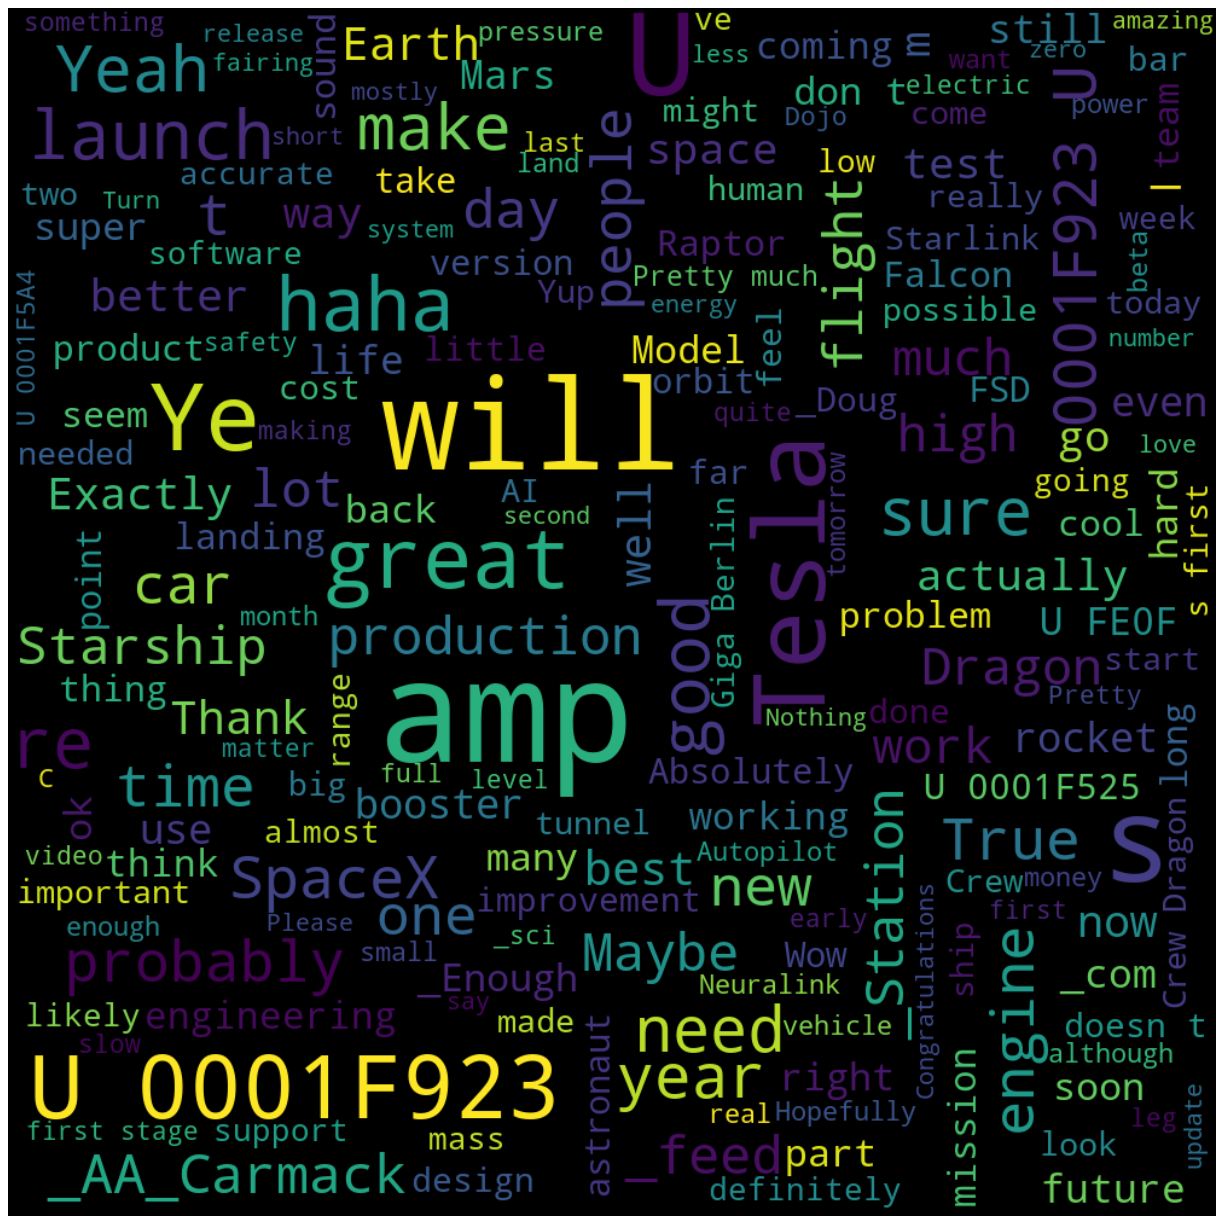

In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([x for x in data["x"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [127]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)
# Print The Data
data

,x,subjectivity,polarity,analysis
0,I�m an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [152]:
positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['x'])

  print('\nnegative tweets')
for i, row in negative_tweets[:15].iterrows():
  print(' -' + row['x'])

positive tweets
 -  Great interview!

negative tweets
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

negative tweets
 -Happy New Year of the Ox! 

negative tweets
 -_   Haha thanks :)

negative tweets
 -The most entertaining outcome is the most likely

negative tweets
 - I�m an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don� 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or� 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That�s what you�re missing.
 - Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas� 
 -  It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land
 - We were too dumb
 -This was a tough one 
 -: This mission enables access for everyday people who dream of g

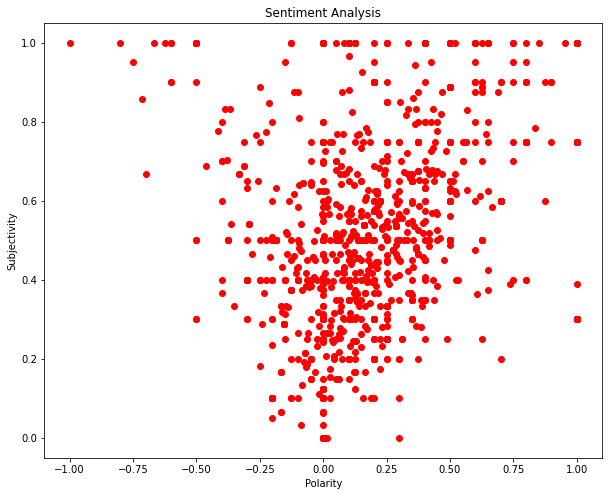

In [155]:
plt.figure(figsize=(10, 8))

for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["x"])


In [195]:
pd.Series(vectorizer.vocabulary_)

an              474
alien           438
_aa_carmack     215
ray            2969
tracing        3750
               ... 
clicking        921
accept          363
samwise        3149
gamgee         1663
altho           456
Length: 4117, dtype: int64

In [197]:
#Word frequency
freq = pd.Series(' '.join(data["x"]).split()).value_counts()[:50] # for top 20
freq

the       403
to        390
is        347
a         324
of        301
&amp;     216
in        203
for       177
be        154
will      136
on        124
:         117
I         114
but       109
that      104
with       99
are        95
it         89
at         85
Tesla      85
The        79
we         77
�          76
and        72
this       72
from       70
have       69
was        68
as         63
This       60
you        58
We         58
has        55
not        54
Yes        50
so         48
more       48
just       47
than       44
should     43
an         39
all        39
can        39
or         37
do         37
It�s       37
like       37
great      36
would      36
launch     36
dtype: int64